In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
sns.set_theme()


In [171]:
df = pd.read_csv('results/'+'progress_threshold.csv')
df_uni = pd.read_csv('results/'+'progress_uni_threshold.csv')
df_tight = pd.read_csv('results/'+'progress_tight_threshold.csv')

In [172]:
print(df['ext_reward'].mean())

0.15779210676803013


In [173]:
def rew_vs_metric(c, label=None):
    c_ext = c['ext_reward']
    c_metric = c['metric']
    sns.lineplot(x=c_ext, y=c_metric, label=label)


In [174]:
def updates_vs_metric(c, label=None):
    c_updates = c['n_updates']
    c_metric = c['metric']
    sns.lineplot(x=c_updates, y=c_metric, label=label)


In [175]:
def updates_vs_rew(c, label=None):
    c_updates = c['n_updates']
    c_rew = c['ext_reward']
    c_rew_std = 0.1*c['ext_reward_std']
    sns.lineplot(x=c_updates, y=c_rew, label=label)
    plt.fill_between(c_updates, c_rew - c_rew_std, c_rew + c_rew_std, alpha=.3)


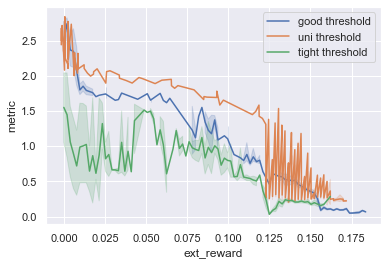

In [176]:
rew_vs_metric(df, label='good threshold')
rew_vs_metric(df_uni, label='uni threshold')
rew_vs_metric(df_tight, label='tight threshold')

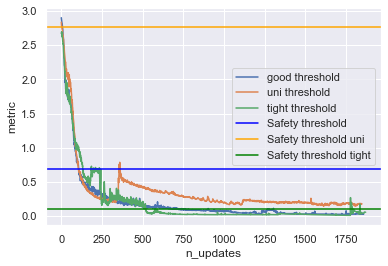

In [177]:
updates_vs_metric(df, label='good threshold')
updates_vs_metric(df_uni, label='uni threshold')
updates_vs_metric(df_tight, label='tight threshold')
p_min = 1/2
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
hline = F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))
plt.axhline(hline, label="Safety threshold", color='blue')
p_min = 1/16
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
hline = F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))
plt.axhline(hline, label="Safety threshold uni", color='orange')
p_min = 0.9
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
hline = F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))
plt.axhline(hline, label="Safety threshold tight", color='green')
plt.legend()
plt.show()

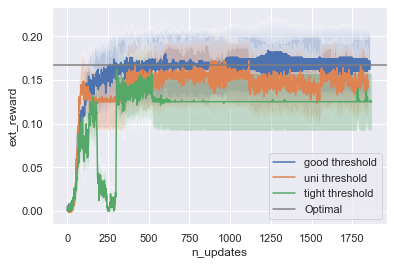

In [184]:
# The tighter the threshold, the more often we see 0 reward or local min through the ep. 
updates_vs_rew(df, label='good threshold')
updates_vs_rew(df_uni, label='uni threshold')
updates_vs_rew(df_tight, label='tight threshold')
plt.axhline(1/6, label="Optimal", color='grey')
plt.legend()
plt.show()

In [180]:
new = pd.read_csv('results/'+'newest.csv')

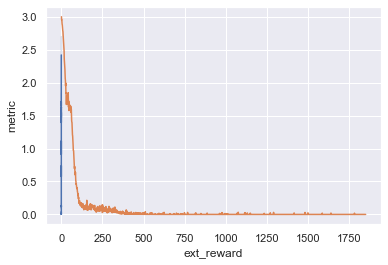

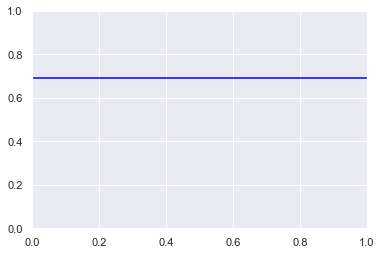

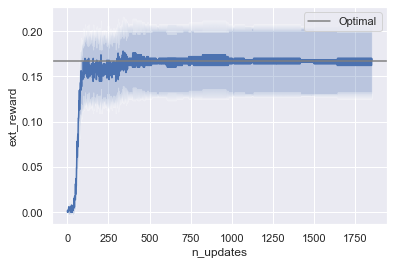

In [185]:
rew_vs_metric(new)
updates_vs_metric(new)
plt.show()
p_min = 1/2
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
hline = F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))
plt.axhline(hline, label="Safety threshold", color='blue')
plt.show()
updates_vs_rew(new)
plt.axhline(1/6, label="Optimal", color='grey')
plt.legend()
plt.show()

In [ ]:
#Next steps. Put agent into new environment without reward, but with e.g. different 'holes' and see that metric goes up. This simulates deployment.



## Calculate initial value and tuning

In [11]:
import torch
import torch.nn.functional as F

In [125]:
p_min = 1/2
l = torch.tensor([p_min]+[(1-p_min)/15]*15)
F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(2.7726)

In [70]:
l = torch.tensor([1/16]*16)
# This is what we want our linear interpolation to start with
start_value = 0.5
np.log(2/(1+start_value) - 1)/-F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(0.3962)

In [105]:
# boundary
l = torch.tensor([1/16]*16)
F.cross_entropy(torch.log(l).unsqueeze(0), torch.tensor(0).unsqueeze(0))

tensor(2.7726)